# Thompson sampling

- It is a Probablistic Algoritem, which narrows down the the chances of outcoume for certain event, By re-factoring the Normal distribution curve as per new Outcomes, from every round.

- a.k.a  Posterior Sampling or Probability Matching.
 
**It is Based on Multi armed bandit problem.**

1. First we assume Normal distribution, for each arm of multi-armed bandit,

1. One-by one we pull every arm (Rounds), and recond the new outcome.
1. We optimize the normal distribution, as per new observations in every round.
    - With increasing number of Rounds, The Distribution graph shrinks and come closer and close to the Actual Outcome probability.
1. At a certian number of rounds, We achive optimal results, and Exploite based on the results to get higher Profits, and Outcome.<br>

<img src='./Reinf_lern_photos/Thompson_sampl.png' alt='Thompson sampling' >

| UCB Algorith | Thompson sampling |
|---|---|
| Deterministic Aproach | Probabilistic Aproach |
| Requires update at every round | Can accommodate dalayed feedback (Batch sampling)|
| | Better empirical evidence|

- In Multi armed-bandit example You can get updates in every round, But in Ads
survay it is vary difficult to gest data for every round, insted we can data in bulk, Therefor Thompson Samling is a better option then UCB. 

### Steps :
1. At each round n, we consider two numbers for each Ad i.
    - N<sub>i</sub><sup>1</sup>(n) - the number of time the Ad i got reward 1 up to round n.
    -  N<sub>i</sub><sup>0</sup>(n) - the number of time the Ad i got reward 0 up to round n.

1. For each Ad i, we take a random draw from distribution below:
    $$ \theta_i(n) = \beta(N^1_i (n) + 1, N^0_i(n) + 1) $$
1. We select the Ad that has highest &theta;<sub>i</sub>(n).

### Pre-processing

In [1]:
# imporinting libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# importing the dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

### Implementing Thompson sampling

In [4]:
import random
N = 10000
d = 10
ads_selected = []

N1 = [0] * d
N0 = [0] * d

for n in range(N):
    
    ad = 0
    max_random = 0
    for i in range(d):
        # random.betavariate(alpha, beta) is used for random beta distribution
        random_beta = random.betavariate(N1[i] + 1, N0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i

    ads_selected.append(ad)
    if dataset.values[n, ad] == 1:
        N1[ad] = N1[ad] + 1
    else:
        N0[ad] = N0[ad] + 1
    
print(ads_selected)

[6, 7, 0, 3, 4, 6, 1, 4, 9, 4, 2, 5, 8, 3, 9, 4, 1, 5, 4, 1, 5, 8, 9, 7, 2, 3, 4, 7, 6, 4, 7, 2, 4, 4, 4, 7, 7, 4, 6, 0, 8, 0, 2, 4, 4, 4, 0, 6, 7, 2, 3, 8, 3, 4, 4, 7, 4, 8, 1, 3, 4, 4, 5, 4, 1, 4, 4, 7, 6, 4, 2, 7, 9, 3, 4, 4, 4, 4, 7, 4, 2, 4, 9, 1, 5, 4, 0, 7, 3, 5, 3, 4, 3, 9, 7, 4, 8, 5, 4, 3, 8, 8, 8, 4, 5, 8, 1, 4, 4, 3, 4, 7, 4, 8, 3, 5, 9, 4, 7, 4, 8, 8, 4, 4, 7, 5, 4, 0, 4, 8, 8, 1, 7, 4, 4, 1, 8, 8, 4, 7, 8, 4, 1, 1, 4, 1, 1, 1, 1, 4, 3, 8, 8, 1, 4, 1, 4, 6, 7, 8, 5, 4, 4, 8, 7, 4, 4, 1, 0, 7, 4, 1, 1, 4, 4, 4, 1, 8, 1, 7, 1, 1, 8, 4, 7, 7, 4, 1, 4, 4, 4, 9, 4, 6, 4, 4, 4, 8, 4, 4, 3, 1, 3, 7, 4, 6, 6, 4, 4, 4, 7, 8, 1, 1, 6, 4, 4, 6, 8, 6, 3, 8, 4, 8, 3, 3, 2, 3, 8, 4, 4, 8, 6, 4, 6, 4, 1, 9, 4, 2, 6, 9, 4, 3, 4, 3, 6, 4, 8, 4, 4, 6, 1, 3, 1, 4, 8, 4, 4, 9, 4, 4, 1, 4, 1, 3, 4, 4, 3, 4, 4, 4, 1, 4, 7, 2, 4, 4, 7, 4, 7, 3, 6, 4, 5, 2, 0, 4, 2, 4, 4, 7, 4, 3, 4, 2, 6, 4, 4, 2, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4, 1, 3, 4, 4, 4, 4, 

### Visualizing Dataset (10,000 rounds)

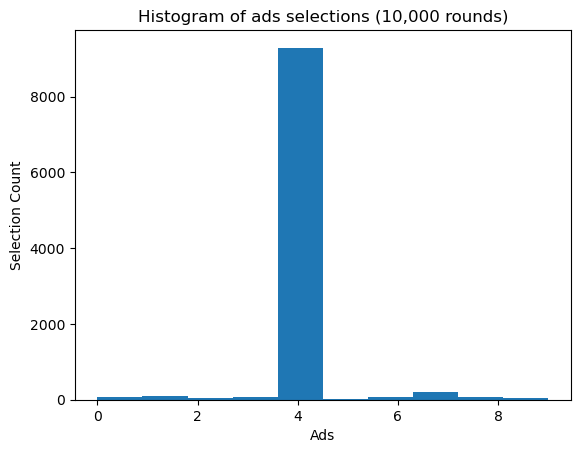

In [5]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections (10,000 rounds)')
plt.xlabel('Ads')
plt.ylabel('Selection Count')
plt.show()

### Visualizing Dataset ( 1000 rounds)

[3, 4, 5, 7, 9, 7, 8, 1, 3, 0, 2, 7, 1, 3, 6, 1, 6, 5, 9, 4, 2, 8, 0, 1, 6, 9, 1, 8, 6, 9, 1, 2, 0, 7, 6, 7, 7, 6, 5, 4, 3, 1, 8, 4, 6, 7, 6, 6, 4, 1, 5, 5, 6, 1, 4, 4, 4, 4, 4, 0, 6, 4, 0, 1, 4, 8, 6, 6, 3, 1, 1, 9, 2, 1, 7, 1, 2, 4, 4, 5, 4, 4, 4, 6, 1, 2, 0, 7, 4, 9, 4, 3, 9, 2, 9, 4, 1, 4, 0, 9, 8, 5, 8, 1, 4, 2, 6, 2, 1, 2, 7, 4, 7, 4, 3, 8, 4, 4, 5, 8, 8, 3, 1, 8, 8, 5, 3, 0, 8, 4, 4, 4, 6, 4, 8, 4, 0, 9, 1, 8, 0, 8, 8, 3, 4, 0, 4, 8, 4, 0, 8, 7, 8, 0, 5, 8, 0, 8, 8, 8, 6, 1, 8, 8, 8, 8, 8, 8, 4, 4, 1, 4, 6, 4, 8, 1, 8, 4, 8, 6, 6, 5, 4, 8, 4, 4, 4, 1, 2, 1, 7, 3, 8, 4, 9, 0, 8, 8, 9, 2, 0, 9, 1, 8, 9, 1, 8, 8, 2, 4, 0, 6, 7, 7, 8, 7, 2, 4, 4, 4, 8, 4, 7, 0, 5, 7, 7, 7, 8, 0, 2, 1, 0, 4, 4, 4, 7, 7, 4, 7, 7, 7, 7, 7, 7, 4, 7, 0, 1, 6, 3, 1, 8, 7, 7, 7, 6, 4, 2, 2, 0, 0, 8, 7, 7, 1, 4, 8, 4, 4, 4, 0, 0, 7, 0, 4, 4, 0, 4, 7, 0, 4, 6, 4, 4, 0, 4, 4, 4, 9, 1, 4, 4, 4, 8, 4, 0, 4, 0, 4, 7, 7, 4, 4, 4, 4, 0, 3, 4, 4, 7, 7, 9, 4, 4, 4, 4, 7, 4, 7, 4, 4, 8, 4, 4, 4, 5, 4, 4, 4, 7, 4, 9, 

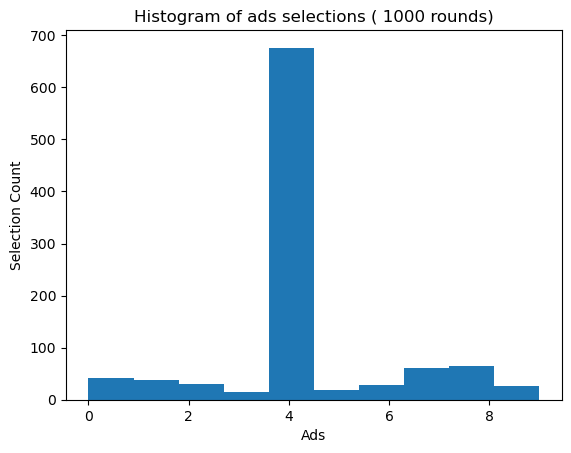

In [12]:
import random
N = 1000
d = 10
ads_selected = []

N1 = [0] * d
N0 = [0] * d

for n in range(N):
    
    ad = 0
    max_random = 0
    for i in range(d):
        # random.betavariate(alpha, beta) is used for random beta distribution
        random_beta = random.betavariate(N1[i] + 1, N0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i

    ads_selected.append(ad)
    if dataset.values[n, ad] == 1:
        N1[ad] = N1[ad] + 1
    else:
        N0[ad] = N0[ad] + 1
    
print(ads_selected)

plt.hist(ads_selected)
plt.title('Histogram of ads selections ( 1000 rounds)')
plt.xlabel('Ads')
plt.ylabel('Selection Count')
plt.show()

### Visualizing Dataset ( 500 rounds)

[0, 0, 8, 9, 1, 9, 7, 3, 6, 4, 5, 7, 0, 8, 2, 4, 1, 8, 1, 4, 8, 8, 4, 8, 8, 2, 0, 5, 6, 8, 3, 7, 4, 4, 0, 7, 8, 1, 3, 3, 9, 3, 4, 5, 8, 4, 0, 6, 5, 5, 9, 3, 7, 6, 7, 4, 7, 8, 4, 1, 0, 3, 2, 9, 8, 0, 1, 0, 5, 8, 8, 8, 2, 3, 2, 0, 7, 0, 1, 1, 1, 0, 1, 6, 4, 0, 8, 0, 9, 5, 3, 7, 7, 8, 7, 8, 0, 3, 8, 3, 3, 4, 7, 4, 6, 8, 1, 8, 4, 1, 4, 4, 1, 2, 5, 9, 9, 1, 1, 7, 7, 4, 7, 7, 4, 8, 4, 4, 4, 2, 4, 4, 2, 8, 1, 1, 2, 0, 1, 4, 1, 7, 3, 7, 7, 1, 4, 7, 7, 2, 4, 0, 1, 1, 4, 7, 3, 7, 7, 3, 1, 6, 4, 7, 7, 7, 7, 4, 3, 7, 7, 4, 7, 7, 4, 3, 3, 7, 6, 4, 3, 7, 7, 7, 4, 7, 4, 6, 4, 9, 4, 4, 2, 7, 7, 7, 7, 4, 2, 4, 7, 9, 4, 3, 6, 2, 7, 3, 7, 3, 3, 7, 7, 0, 7, 8, 7, 4, 1, 7, 8, 8, 8, 7, 7, 1, 1, 2, 4, 7, 3, 4, 3, 4, 8, 4, 7, 3, 1, 4, 8, 8, 7, 2, 3, 4, 7, 2, 3, 3, 7, 3, 7, 7, 4, 6, 8, 8, 3, 5, 7, 0, 1, 7, 6, 4, 4, 8, 1, 8, 2, 7, 5, 3, 5, 4, 4, 1, 4, 3, 8, 1, 4, 7, 7, 8, 8, 4, 4, 7, 0, 8, 7, 3, 4, 7, 4, 3, 7, 6, 4, 8, 7, 3, 7, 7, 8, 4, 4, 3, 7, 4, 7, 4, 3, 3, 7, 0, 7, 4, 4, 3, 4, 3, 1, 7, 4, 7, 7, 4, 7, 4, 2, 

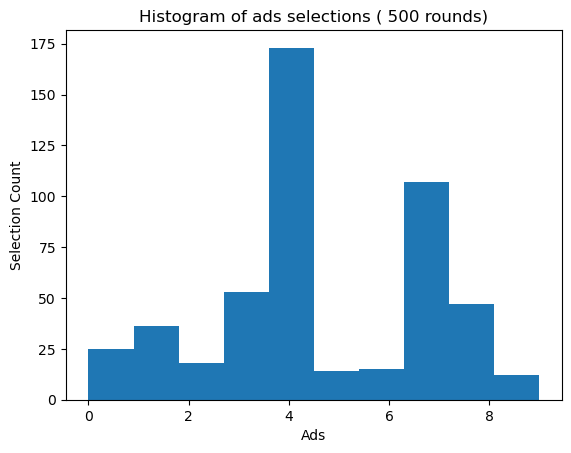

In [15]:
import random
N = 500
d = 10
ads_selected = []

N1 = [0] * d
N0 = [0] * d

for n in range(N):
    
    ad = 0
    max_random = 0
    for i in range(d):
        # random.betavariate(alpha, beta) is used for random beta distribution
        random_beta = random.betavariate(N1[i] + 1, N0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i

    ads_selected.append(ad)
    if dataset.values[n, ad] == 1:
        N1[ad] = N1[ad] + 1
    else:
        N0[ad] = N0[ad] + 1
    
print(ads_selected)

plt.hist(ads_selected)
plt.title('Histogram of ads selections ( 500 rounds)')
plt.xlabel('Ads')
plt.ylabel('Selection Count')
plt.show()

- As we can conclude from above examples, that **Thompson samping is more powerfull then UCB** where it can accurately predict the best possible Ads even with as **low as 500 round** (Which UCB could not do).

- But the **predictions are probabilistic** i.e they **change  every time** you run the program the outcome may not be Absolute like UCB, This is due to use of **Randome Beta** function.